In [1]:
import json

with open('results.json') as f:
    results = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 20)
    fig.set_size_inches(30, 5)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        # image = image / 255.0
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id}")
    print()
    pair = results[concept_id]
    print(pair["concept"])
    plot_instances(pair["feature"])

Concept #0

[['red', 0.8271696169201921], ['four', 0.8042785213245609], ['three', 0.36357142252590113], ['blue', 0.19805642693205092], ['round', 0.10702138951036898], ['green', 0.044800874280906094], ['angle', 0.042047761384647615], ['this', 0.04170712096904351], ['canvas', 0.034865828707459606], ['shape', 0.03307647159156518]]


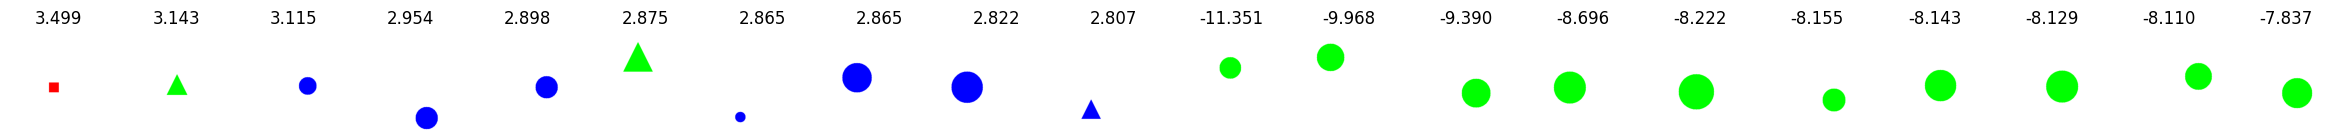

Concept #1

[['blue', 0.7503501296043396], ['three', 0.378024060818238], ['green', 0.21548220420755992], ['white', 0.0942058178483369], ['blank', 0.08473016920335907], ['angle', 0.07840770783160275], ['four', 0.07613067506411211], ['round', 0.06887874377633983], ['this', 0.06541513316636163], ['color', 0.05792080274351486]]


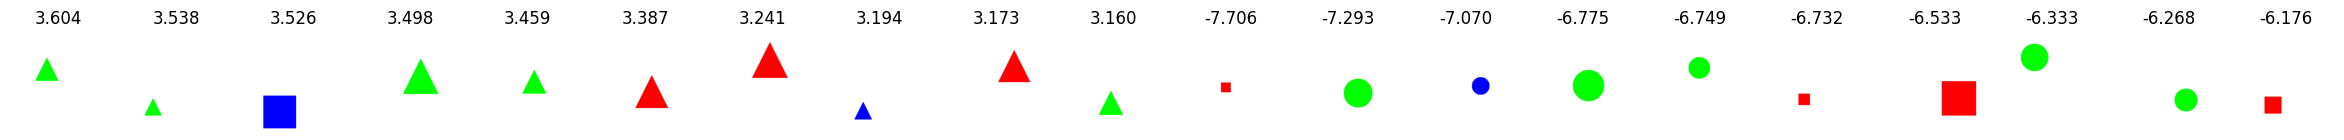

Concept #2

[['green', 0.5620784761278126], ['is', 0.5234114555323996], ['three', 0.4056519008991195], ['round', 0.2025248840572388], ['red', 0.20181848020179244], ['blue', 0.1180219281691967], ['has', 0.07252363333009122], ['four', 0.07086706703937636], ['color', 0.06538159264286925], ['shape', 0.05487347376863485]]


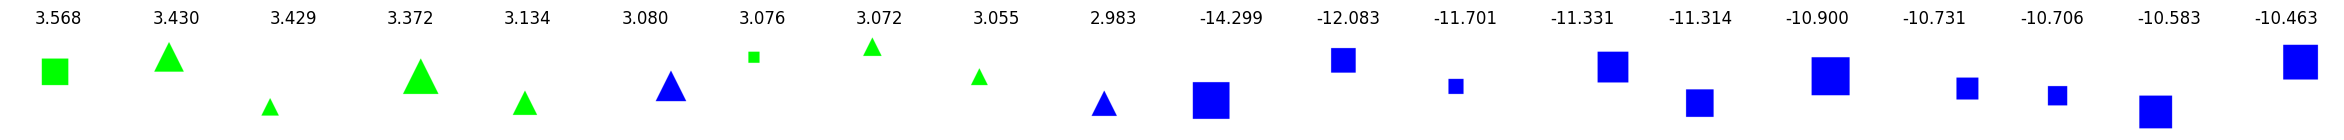

Concept #3

[['four', 0.9763460726272769], ['green', 0.284202299439689], ['blue', 0.27431132605041914], ['three', 0.23089688662591018], ['red', 0.18627840177330182], ['round', 0.1534663990261109], ['this', 0.06160275231766689], ['angle', 0.05056131562971457], ['left', 0.04705344820715588], ['shape', 0.035120009327796985]]


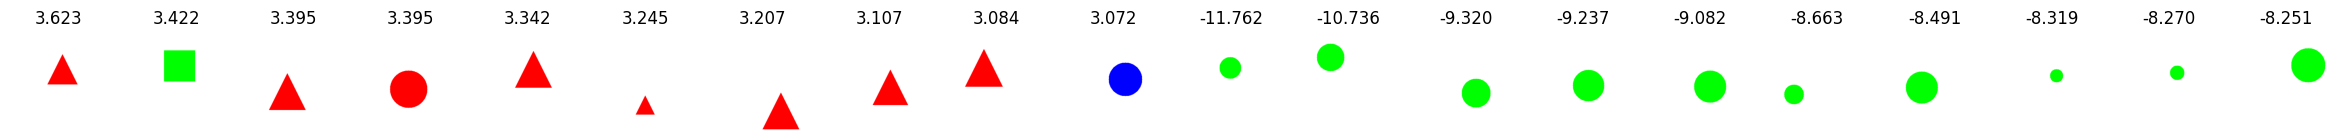

Concept #4

[['green', 0.7773689847651536], ['four', 0.4951902403579495], ['blue', 0.4586700263062144], ['angle', 0.204026423473426], ['round', 0.07746153403588427], ['color', 0.06434822155914817], ['three', 0.04978359651759388], ['is', 0.044413273299976096], ['has', 0.042086397937491415], ['up', 0.040439390580039855]]


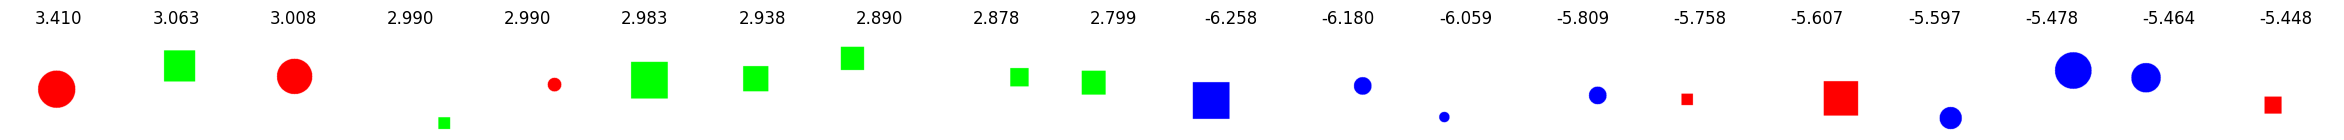

Concept #5

[['blue', 0.8137015855409265], ['four', 0.44761020613879693], ['green', 0.30349510687638104], ['color', 0.1449769235609811], ['angle', 0.07881844022909437], ['round', 0.06725465668955954], ['three', 0.06624304893752181], ['left', 0.04695787500663893], ['is', 0.046784810110078595], ['right', 0.04346559935356606]]


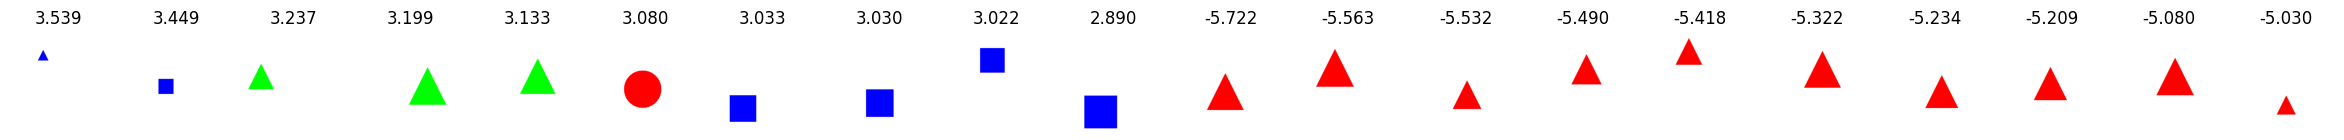

Concept #6

[['red', 0.9337586151875131], ['blue', 0.33241424846455336], ['green', 0.1976615733732053], ['four', 0.16027821421138638], ['shape', 0.10503222381691057], ['has', 0.09031236414547737], ['angle', 0.08604314584527316], ['is', 0.060358205809432075], ['rotate', 0.0545876536135092], ['color', 0.03912605401103291]]


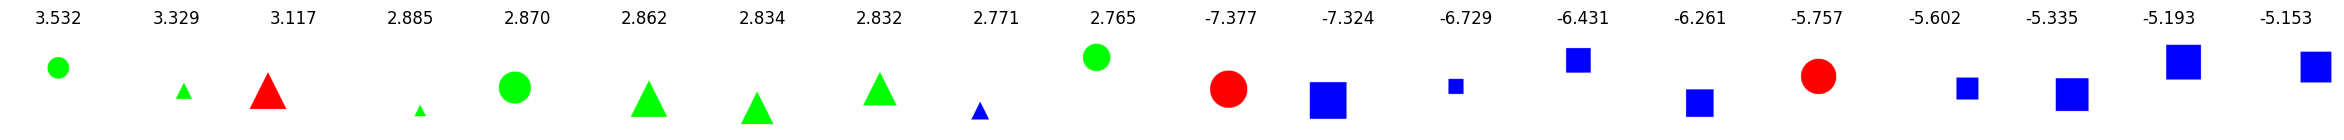

Concept #7

[['green', 0.6734250559070246], ['red', 0.4775556669002626], ['four', 0.4246805488094082], ['round', 0.13853577919364946], ['color', 0.11761028303494703], ['three', 0.10538143785746117], ['this', 0.06945619202524343], ['angle', 0.0614475332094523], ['blue', 0.04916261541467857], ['has', 0.03361604549672182]]


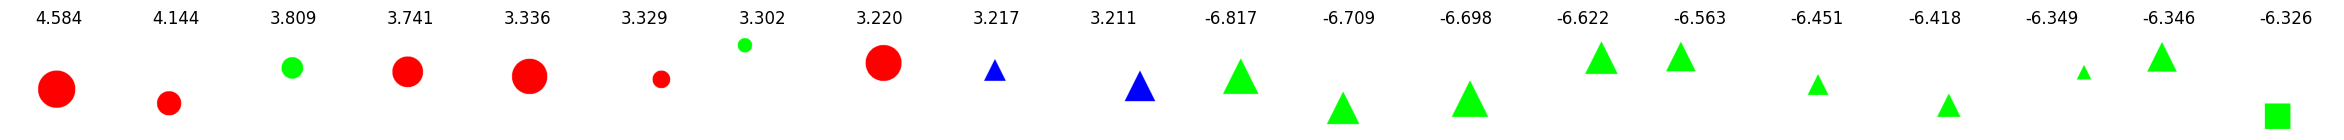

Concept #8

[['red', 0.7407106055476801], ['blue', 0.5319586903099122], ['four', 0.34181014364812434], ['color', 0.12674145492116812], ['angle', 0.12016227801701403], ['round', 0.11452587655162423], ['green', 0.10906809762847133], ['three', 0.04591112115791416], ['is', 0.03652411380676719], ['this', 0.035304185231203634]]


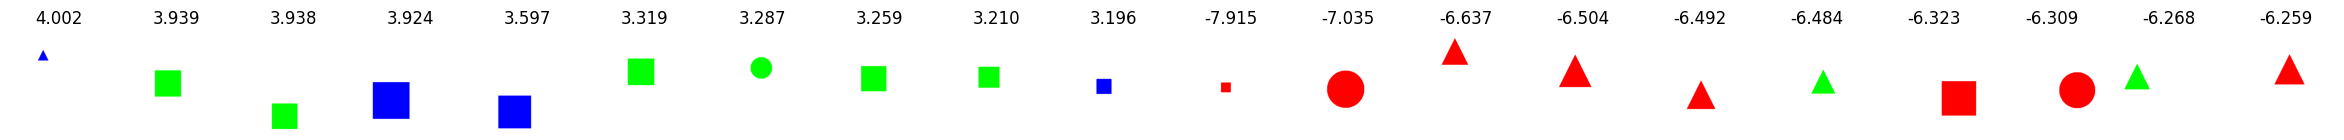

Concept #9

[['four', 0.5013019951863017], ['three', 0.2555373159365925], ['blue', 0.25302698963541326], ['round', 0.25228212453970095], ['green', 0.20858199601250935], ['color', 0.14030504275951283], ['is', 0.11354411050556151], ['red', 0.08172068690684268], ['unrotate', 0.051663201474500514], ['angle', 0.046129395570454555]]


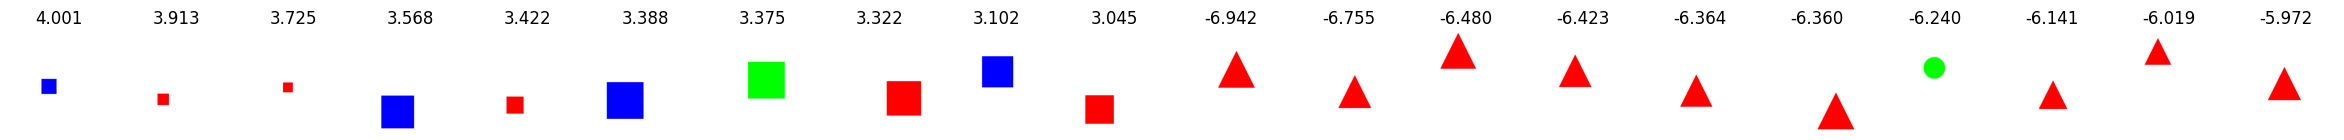

In [5]:
for i in range(10):
    visualize_concept(i)